# import and visualize oil data

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [5]:
oildata = pd.read_csv('oil.csv',sep=',',header=0,index_col=0)
oildata.head()

,OilProduction
1965,111.009135
1966,130.828434
1967,141.287088
1968,154.227775
1969,162.740865


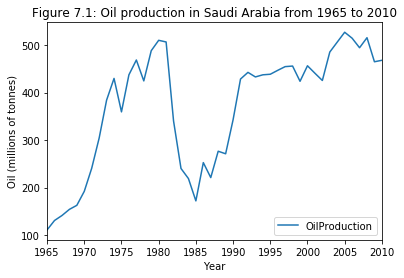

In [6]:
plt.figure();
axes = oildata.plot();
axes.set_xlabel('Year')
axes.set_ylabel('Oil (millions of tonnes)')
axes.set_title('Figure 7.1: Oil production in Saudi Arabia from 1965 to 2010');

# Reproduce plot in Figure 7.2

adjust=False specification in the ewm method ensures that weighted averages are calculated recursively as:

weighted_average[0] = data[0]; weighted_average[i] = (1-alpha)*weighted_average[i-1] + alpha*data[i].

In [22]:
# extract data from 1996 to 2007 and perform SES
trainOilData =  oildata.loc[1996:2007].rename(index=str, columns={"OilProduction": "Observed values"})
fit1 = trainOilData.ewm(alpha=0.2,adjust=False).mean().rename(index=str, columns={"Observed values": "alpha=0.2"})
fit2 = trainOilData.ewm(alpha=0.6,adjust=False).mean().rename(index=str, columns={"Observed values": "alpha=0.6"})
combined = pd.concat([trainOilData,fit1,fit2],axis=1)
combined


,Observed values,alpha=0.2,alpha=0.6
1996,446.656523,446.656523,446.656523
1997,454.473307,448.219880,451.346593
1998,455.662974,449.708498,453.936422
1999,423.632239,444.493247,435.753912
2000,456.271328,446.848863,448.064362
2001,440.588050,445.596700,443.578575
2002,425.332520,441.543864,432.630942
2003,485.149448,450.264981,464.142046
2004,506.048162,461.421617,489.285715
2005,526.791983,474.495690,511.789476


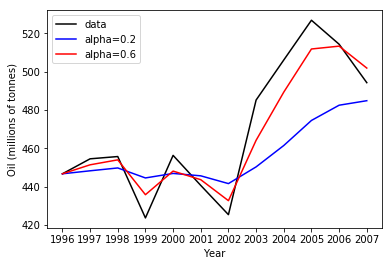

In [23]:
# plot graphs
fig, axes = plt.subplots()
axes.plot(trainOilData.index,trainOilData,color='black',label='data')
axes.plot(fit1.index,fit1,color='blue',label='alpha=0.2')
axes.plot(fit2.index,fit2,color='red',label='alpha=0.6')
axes.set_xlabel('Year')
axes.set_ylabel('Oil (millions of tonnes)')
axes.legend();